In [12]:
import cv2
import os
import matplotlib.pyplot as plt
from collections import Counter

def isgray(imgpath):
    img = cv2.imread(imgpath)
    if len(img.shape) < 3:
        return True
    if img.shape[2] == 1:
        return True
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    if (b == g).all() and (b == r).all():
        return True
    return False

image_sizes = Counter()
def check_images(directory):
    grayscale_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  
                filepath = os.path.join(root, file)
                if isgray(filepath):
                    grayscale_images.append(file)
                size = cv2.imread(filepath).shape
                image_sizes[size] += 1
    if grayscale_images:
        print(len(grayscale_images))
        print("Grayscale images found:")
        print(grayscale_images)
    else:
        print("No grayscale images found.")
    
check_images('isic2019_modified')


No grayscale images found.


In [48]:
for image_size, frequency in image_sizes.most_common(10):
    print(f"image size:{image_size} and frequency:{frequency}")


image size:(1024, 1024, 3) and frequency:10325
image size:(450, 600, 3) and frequency:6672
image size:(680, 1024, 3) and frequency:773
image size:(768, 1024, 3) and frequency:479
image size:(224, 224, 3) and frequency:266
image size:(416, 416, 3) and frequency:240
image size:(685, 1024, 3) and frequency:103
image size:(682, 1024, 3) and frequency:93
image size:(764, 1024, 3) and frequency:81
image size:(681, 1024, 3) and frequency:51


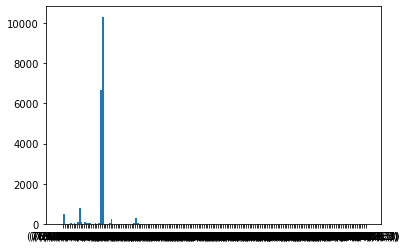

In [45]:
labels, values = image_sizes.keys(), image_sizes.values()

import numpy as np
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [5]:
import os 
import torch
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from tqdm.notebook import tqdm

data_dir = 'isic2019_modified'
train_dir = f'{data_dir}/train'
N_CHANNELS = 3


In [10]:
def compute_stats(train_loader):
    # Initialize sums and squared sums
    sum_means = torch.zeros(N_CHANNELS)
    sum_vars = torch.zeros(N_CHANNELS)
    n_pixels_per_channel = 0

    # Compute sums and squared sums
    for inputs, _ in tqdm(train_loader):
        # inputs shape is [batch_size, channels, height, width]
        n_batch, n_channels, height, width = inputs.shape
        print(inputs.shape)
        n_pixels_per_channel += n_batch * height * width
        
        sum_means += inputs.sum(dim=[0, 2, 3])  # sum over batch, height, and width for each channel
        sum_vars += (inputs ** 2).sum(dim=[0, 2, 3])

    # Calculate mean and std
    mean = sum_means / n_pixels_per_channel
    std = torch.sqrt(sum_vars / n_pixels_per_channel - mean ** 2)

    print('Mean:', mean)
    print('Std Deviation:', std)

In [6]:
data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
train_dataset = datasets.ImageFolder(train_dir, data_transforms) 
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=False, num_workers=os.cpu_count())
compute_stats(train_loader)


  0%|          | 0/17591 [00:00<?, ?it/s]

Mean: tensor([0.6517, 0.5231, 0.5156])
Std Deviation: tensor([0.2293, 0.2076, 0.2190])


In [8]:
data_transforms = transforms.Compose([
        transforms.Resize((256, 240)),
        transforms.ToTensor()
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
train_dataset = datasets.ImageFolder(train_dir, data_transforms) 
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=False, num_workers=os.cpu_count())
compute_stats(train_loader)


  0%|          | 0/17591 [00:00<?, ?it/s]

Mean: tensor([0.6518, 0.5231, 0.5156])
Std Deviation: tensor([0.2293, 0.2076, 0.2190])


In [9]:
data_transforms = transforms.Compose([
        transforms.Resize((288, 288)),
        transforms.ToTensor()
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
train_dataset = datasets.ImageFolder(train_dir, data_transforms) 
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=False, num_workers=os.cpu_count())
compute_stats(train_loader)

  0%|          | 0/17591 [00:00<?, ?it/s]

Mean: tensor([0.6517, 0.5231, 0.5156])
Std Deviation: tensor([0.2294, 0.2077, 0.2192])
